In [1]:
import sys
sys.path.append("../src")
import preprocessing
import cconfig
import clustering

# Plotting defaults
%matplotlib inline
import matplotlib.pyplot as plt



# Load data and preprocess

In [2]:
# load original data in dataframes, sample, select some features and scale
df,df_Normal,df_Attack=preprocessing.data_load(0.1,None ,False)
X=preprocessing.data_scale(df[cconfig.SELECTED_FEATURES_FLOW])
X_Normal=preprocessing.data_scale(df_Normal[cconfig.SELECTED_FEATURES_FLOW])
X_Attack=preprocessing.data_scale(df_Attack[cconfig.SELECTED_FEATURES_FLOW])

In [9]:
df_Normal.total_packets.describe()

count    14696.000000
mean        26.494148
std         49.468648
min          3.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        997.000000
Name: total_packets, dtype: float64

# KMEANS

In [ ]:
# find the best number of clusters
df_silhouette = clustering.kmeans_get_number_clusters(X_Normal)

# select best number of clusters for kmeans
num_clusters=df_silhouette.iloc[df_silhouette.score.idxmax() ]['Num Clusters']

# plot the result for reference
df_silhouette.plot(x='Num Clusters', y='score')

In [ ]:
# fit kmeans model with normal day data
kmeans=clustering.kmeans_train(X_Normal,num_clusters)

# predictions with attack dataset
labels=clustering.kmeans_predict(X_Attack,kmeans)

# dimensionality reduction
XR=preprocessing.get_pc(X_Attack,2)

# print results
clustering.clustering_print_results(df_Attack,labels,cconfig.SELECTED_FEATURES_FLOW,XR,True,True)

# DBSCAN

Estimated number of clusters: 6
Estimated number of noise points: 1466
Total points: 32490
Variability explained by the PC: 0.5650638197536567

Cluster -1: 1466 data points
                   src              dst                    start  \
39567    172.217.10.78    192.168.10.12  2017-07-03 13:28:07.231   
127567   192.168.10.51  205.185.208.154  2017-07-03 14:12:02.614   
8409    107.154.79.224    192.168.10.19  2017-07-03 13:49:59.399   

                         finish  total_duration protocol  total_bytes  \
39567   2017-07-03 13:28:07.578        0.347580  TLSv1.2         9465   
127567  2017-07-03 14:12:03.743        1.129351  TLSv1.2        28434   
8409    2017-07-03 13:50:04.315        4.915523    TLSv1        15596   

        total_packets  src_ports  dst_ports        pps        bps         bpp  \
39567             297        443      34908  854.48000  27231.000   31.868687   
127567            148      58362        443  131.04870  25177.290  192.121622   
8409              

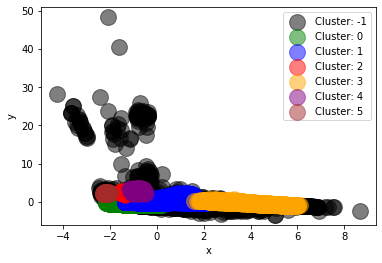

In [10]:
# define hyper parameters for dbscan
eps=0.5
min_samples=26

# fit and predict
dblabels=clustering.dbscan_fit_predict(eps,min_samples,X)

# do dimensionality reduction to plot
XR=preprocessing.get_pc(X,2)

# print and plot
clustering.clustering_print_results(df,dblabels,cconfig.SELECTED_FEATURES_FLOW,XR,True,True)

# OPTIC

In [5]:
# define hyper params for optics
eps=0.5
min_samples=26

# predict using optics
labels=clustering.optics_fit_predict(X,min_samples,'dbscan', eps)

# do dimensionality reduction to plot
XR=preprocessing.get_pc(X,2)

# print and plot
clustering.clustering_print_results(df,labels,cconfig.SELECTED_FEATURES_FLOW,XR,True,True)

# IFOREST

In [ ]:
# model iforest
iforest=clustering.iforest_train(X_Normal)
labels=clustering.iforest_predict(X_Attack,iforest)

# dimensionality reduction
XR=preprocessing.get_pc(X_Attack,2)

# print results
clustering.clustering_print_results(df_Attack,labels,cconfig.SELECTED_FEATURES_FLOW,XR,True,True)